## A Demo on P-Sonic Log Prediction using Machine Learning in the Volve Field Dataset

See the complete notebook [here](https://github.com/yohanesnuwara/volve-machine-learning/blob/main/notebook/volve_p_sonic_prediction_final.ipynb). In this shortened workflow, it assumes that we have previously done data prepro.

https://yohanesnuwara.github.io/talks/

https://yohanesnuwara.github.io/talks/2020-10-29-alexandriaml

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [6]:
#!pip install lasio
import lasio

In [2]:
# !git clone https://github.com/yohanesnuwara/volve-machine-learning

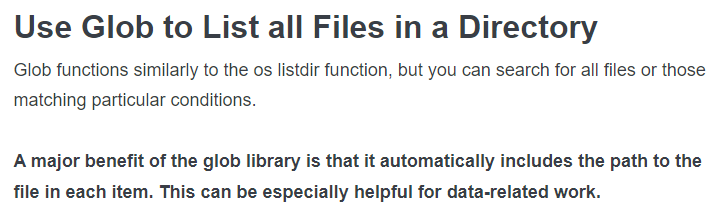

In [15]:
import glob
import os

paths = sorted(glob.glob(os.path.join("C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs", "*.LAS")))
paths

['C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-11A.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-11B.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-1A.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-1B.LAS',
 'C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs\\15_9-F-1C.LAS']

In [24]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("C:\\Users\\rivil\\DataCampINeuron\\Geophysics\\volve-machine-learning-main\\well_logs", "*.LAS")))

well_df = [0] * 5

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()


#well_df
well1, well2, well3, well4, well5 = well_df


In [25]:
well5

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,GR,NBGRCFM,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39476,4093.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8147,NaN,NaN,NaN
39477,4093.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8163,NaN,NaN,NaN
39478,4093.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8179,NaN,NaN,NaN
39479,4093.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


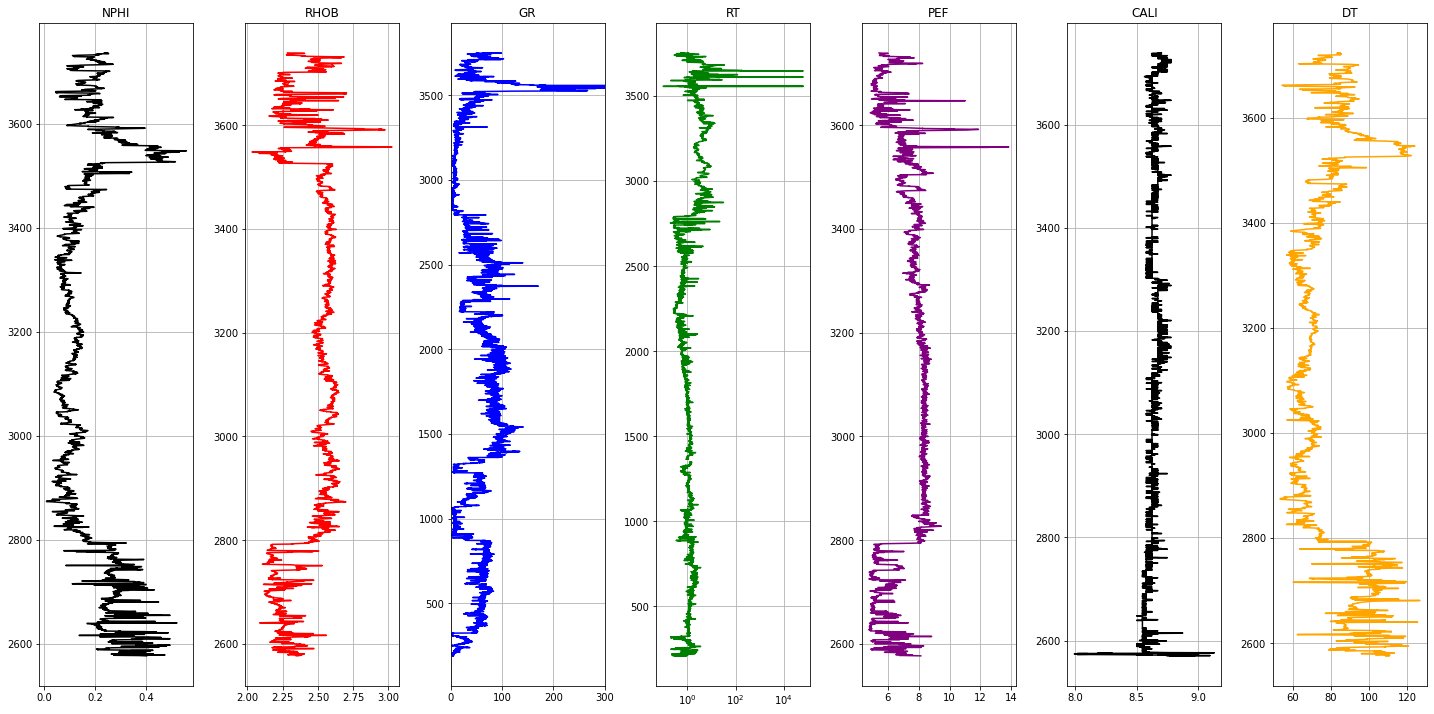

In [32]:
# display
# wels 1,3,4 - train data;  welss 2,5 - test data

# for predictions, all the wells have to have the same amount of curve-logs
well = well1

# define logs to be used
logs=['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' , 'DT']
colors=["black","red","blue","green","purple","black", "orange"]
fig, ax=plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

for i in range(len(logs)):
    if i==3:
        # for resistivity, semilog plot
        ax[i].semilogx(well[logs[i]], well["DEPTH"], color=colors[i])
    else:
        # for non-resistivity, normal plot
        ax[i].plot(well[logs[i]], well["DEPTH"], color=colors[i])
    ax[i].set_title(logs[i])
    ax[i].grid(True)

ax[2].set_xlim(0,300)
plt.tight_layout(1,1)  # so that the y-axis values do not overlap between plots
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


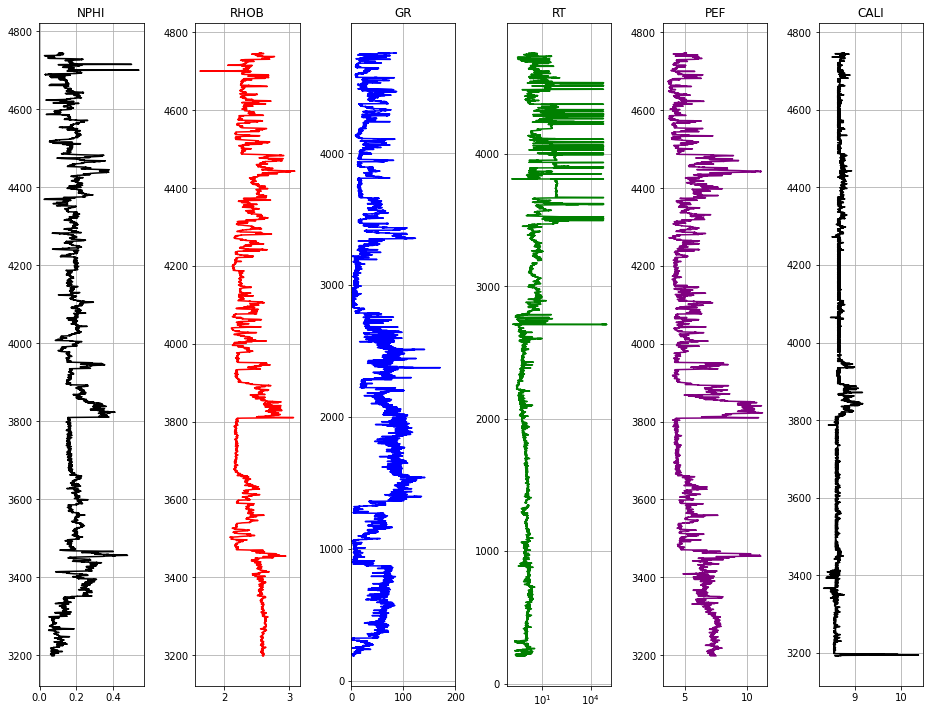

In [33]:
# display
# wels 1,3,4 - train data;  welss 2,5 - test data

well = well2

# define logs to be used
logs=['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' ]
colors=["black","red","blue","green","purple","black"]
fig, ax=plt.subplots(nrows=1, ncols=len(logs), figsize=(13,10))

for i in range(len(logs)):
    if i==3:
        # for resistivity, semilog plot
        ax[i].semilogx(well[logs[i]], well["DEPTH"], color=colors[i])
    else:
        # for non-resistivity, normal plot
        ax[i].plot(well[logs[i]], well["DEPTH"], color=colors[i])
    ax[i].set_title(logs[i])
    ax[i].grid(True)

ax[2].set_xlim(0,200)
plt.tight_layout(1,1)  # so that the y-axis values do not overlap between plots
plt.show()

# Data preparation
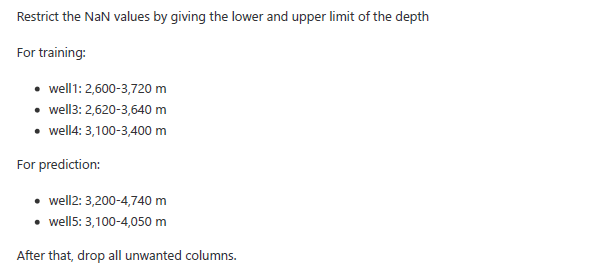

In [34]:
well5

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,GR,NBGRCFM,...,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39476,4093.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8147,NaN,NaN,NaN
39477,4093.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8163,NaN,NaN,NaN
39478,4093.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.8179,NaN,NaN,NaN
39479,4093.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# lower limits
low=[2600,3200,2620,3100,3100]
# upper limits
up=[3720,4740,3640,3400,4050]
# columns to use for training
train_cols = ['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' , 'DT']
# columns to use for test
test_cols = ['DEPTH','NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']
# train/test wells
train_wells=[1,3,4]
test_wells=[2,5]

well_df_restrict=[0]*5

for i in range(len(well_df)):
    # restrict depth by the low/up limis
    low_restrict=well_df[i]['DEPTH']>=low[i]
    up_restrict=well_df[i]['DEPTH']<=up[i]
    df=well_df[i].loc[low_restrict & up_restrict]
    
    if i+1 in train_wells:
        well_df_restrict[i]=df[train_cols]  # drop unwanted columns
    else:
        well_df_restrict[i]=df[test_cols]  # drop unwanted columns
        
well1, well2, well3, well4, well5=well_df_restrict

well5



,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI
29541,3100.0,0.1378,2.5729,33.1264,3.0503,7.9837,8.5243
29542,3100.1,0.1368,2.5696,32.5644,3.0585,7.9401,8.5243
29543,3100.2,0.1351,2.5670,32.3169,3.0454,7.9126,8.5243
29544,3100.3,0.1341,2.5668,32.9734,3.0365,7.9216,8.5243
29545,3100.4,0.1349,2.5690,33.0557,3.0844,7.9582,8.5243
...,...,...,...,...,...,...,...
39037,4049.6,0.3107,2.4184,106.7613,2.6950,6.2332,8.5569
39038,4049.7,0.2997,2.4186,109.0336,2.6197,6.2539,8.5569
39039,4049.8,0.2930,2.4232,106.0935,2.5948,6.2883,8.5570
39040,4049.9,0.2892,2.4285,105.4931,2.6344,6.3400,8.6056


In [77]:
well1.isnull().sum()  # check for nan
well5.isnull().sum()

DEPTH    0
NPHI     0
RHOB     0
GR       0
RT       0
PEF      0
CALI     0
dtype: int64

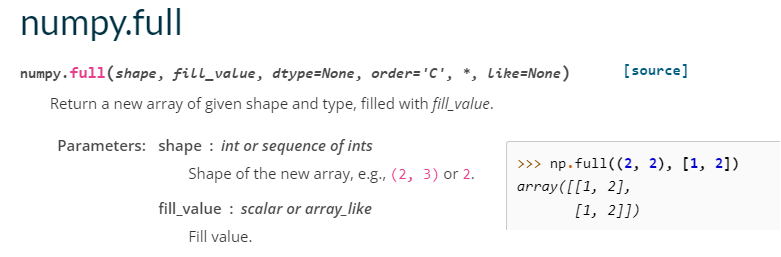

In [78]:
well_train = pd.concat([well1,well3,well4])
well_train

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI,DT
24115,2600.0,0.3710,2.3560,82.7480,1.3230,7.1260,8.6480,104.6050
24116,2600.1,0.3410,2.3380,79.3990,1.1960,6.6540,8.5780,103.8270
24117,2600.2,0.3080,2.3150,74.2480,1.1710,6.1050,8.5780,102.7400
24118,2600.3,0.2830,2.2910,68.5420,1.1420,5.6130,8.5470,100.9430
24119,2600.4,0.2720,2.2690,60.3140,1.1070,5.2810,8.5230,98.4730
...,...,...,...,...,...,...,...,...
32537,3399.6,0.1861,2.4571,60.4392,1.2337,5.9894,8.7227,75.3947
32538,3399.7,0.1840,2.4596,61.8452,1.2452,6.0960,8.6976,75.3404
32539,3399.8,0.1798,2.4637,61.1386,1.2960,6.1628,8.6976,75.3298
32540,3399.9,0.1780,2.4714,59.3751,1.4060,6.1520,8.6976,75.3541


In [79]:
well_train.isnull().sum()

DEPTH    0
NPHI     0
RHOB     0
GR       0
RT       0
PEF      0
CALI     0
DT       0
dtype: int64

In [80]:
names=["15_9_F_11A","15_9_F_11B","15_9_F_1A","15_9_F1B","15_9_F_1C"]
np.full(len(well_df_restrict[0]),names[0])

array(['15_9_F_11A', '15_9_F_11A', '15_9_F_11A', ..., '15_9_F_11A',
       '15_9_F_11A', '15_9_F_11A'], dtype='<U10')

In [81]:
import itertools
names_train=np.full(len(well_df_restrict[0]),names[0])
print(names_train)
list(itertools.chain.from_iterable(names_train))

['15_9_F_11A' '15_9_F_11A' '15_9_F_11A' ... '15_9_F_11A' '15_9_F_11A'
 '15_9_F_11A']


['1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_',
 '1',
 '1',
 'A',
 '1',
 '5',
 '_',
 '9',
 '_',
 'F',
 '_'

In [84]:
# merge datasets in two single dataframes for training and test. Then assign well names
# for the sake of next workflows, the unwanted column location must be changed to the right.

well_train = pd.concat([well1,well3,well4])
well_pred = pd.concat([well2,well5])

names=["15_9_F_11A","15_9_F_11B","15_9_F_1A","15_9_F1B","15_9_F_1C"]
names_train=[]
names_pred=[]
train_wells=[1,3,4]

for i in range(len(well_df_restrict)):
    if i+1 in train_wells:
        names_train.append(np.full(len(well_df_restrict[i]),names[i]))  #list of names, size length of wells
    else:
        names_pred.append(np.full(len(well_df_restrict[i]),names[i]))
    
import itertools  # conctenate inside list

names_train=list(itertools.chain.from_iterable(names_train))
names_pred=list(itertools.chain.from_iterable(names_pred))

well_train["WELL"]=names_train
well_pred["WELL"]=names_pred
#print(names_train)

# move the depth column to the right
depth_train, depth_pred = well_train.pop("DEPTH"), well_pred.pop("DEPTH")
well_train["DEPTH"], well_pred["DEPTH"]=depth_train, depth_pred

print('well_train:',well_train.isnull().sum())
print('well_pred:',well_pred.isnull().sum())
well_pred
                


well_train: NPHI     0
RHOB     0
GR       0
RT       0
PEF      0
CALI     0
DT       0
WELL     0
DEPTH    0
dtype: int64
well_pred: NPHI     0
RHOB     0
GR       0
RT       0
PEF      0
CALI     0
WELL     0
DEPTH    0
dtype: int64


,NPHI,RHOB,GR,RT,PEF,CALI,WELL,DEPTH
30115,0.0750,2.6050,9.3480,8.3310,7.4510,8.5470,15_9_F_11B,3200.0
30116,0.0770,2.6020,9.3620,8.2890,7.4640,8.5470,15_9_F_11B,3200.1
30117,0.0780,2.5990,9.5450,8.2470,7.4050,8.5470,15_9_F_11B,3200.2
30118,0.0790,2.5940,11.1530,8.2060,7.2920,8.5470,15_9_F_11B,3200.3
30119,0.0780,2.5890,12.5920,8.1650,7.1670,8.5470,15_9_F_11B,3200.4
...,...,...,...,...,...,...,...,...
39037,0.3107,2.4184,106.7613,2.6950,6.2332,8.5569,15_9_F_1C,4049.6
39038,0.2997,2.4186,109.0336,2.6197,6.2539,8.5569,15_9_F_1C,4049.7
39039,0.2930,2.4232,106.0935,2.5948,6.2883,8.5570,15_9_F_1C,4049.8
39040,0.2892,2.4285,105.4931,2.6344,6.3400,8.6056,15_9_F_1C,4049.9


In [85]:
well_train

,NPHI,RHOB,GR,RT,PEF,CALI,DT,WELL,DEPTH
24115,0.3710,2.3560,82.7480,1.3230,7.1260,8.6480,104.6050,15_9_F_11A,2600.0
24116,0.3410,2.3380,79.3990,1.1960,6.6540,8.5780,103.8270,15_9_F_11A,2600.1
24117,0.3080,2.3150,74.2480,1.1710,6.1050,8.5780,102.7400,15_9_F_11A,2600.2
24118,0.2830,2.2910,68.5420,1.1420,5.6130,8.5470,100.9430,15_9_F_11A,2600.3
24119,0.2720,2.2690,60.3140,1.1070,5.2810,8.5230,98.4730,15_9_F_11A,2600.4
...,...,...,...,...,...,...,...,...,...
32537,0.1861,2.4571,60.4392,1.2337,5.9894,8.7227,75.3947,15_9_F1B,3399.6
32538,0.1840,2.4596,61.8452,1.2452,6.0960,8.6976,75.3404,15_9_F1B,3399.7
32539,0.1798,2.4637,61.1386,1.2960,6.1628,8.6976,75.3298,15_9_F1B,3399.8
32540,0.1780,2.4714,59.3751,1.4060,6.1520,8.6976,75.3541,15_9_F1B,3399.9


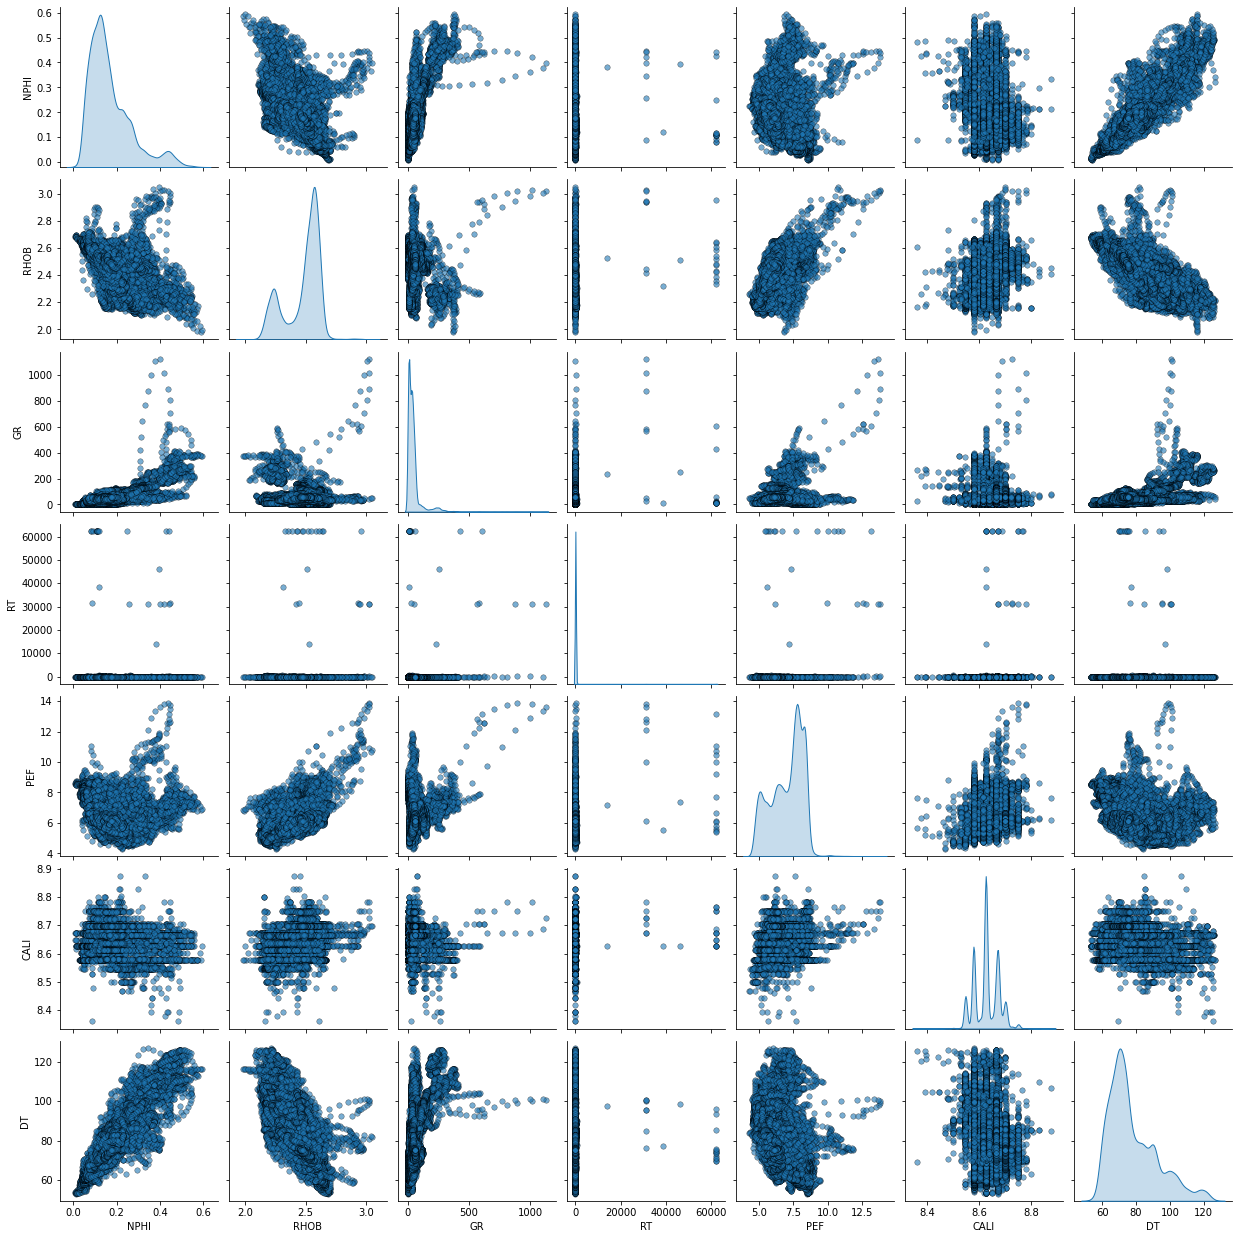

In [86]:
# Exploratory Analysis

train_features = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' , 'DT']
sns.pairplot(well_train, vars=train_features, diag_kind="kde",
            plot_kws={"alpha":0.6, "s":30, "edgecolor":"k"})

### spearmans correlation map

In [87]:
mask = np.zeros_like(well_train[train_features].corr(method="spearman"), dtype=np.bool)
mask

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

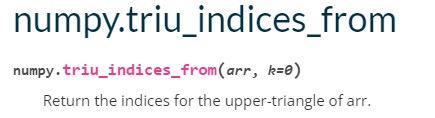

In [88]:
mask[np.triu_indices_from(mask)]=True
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

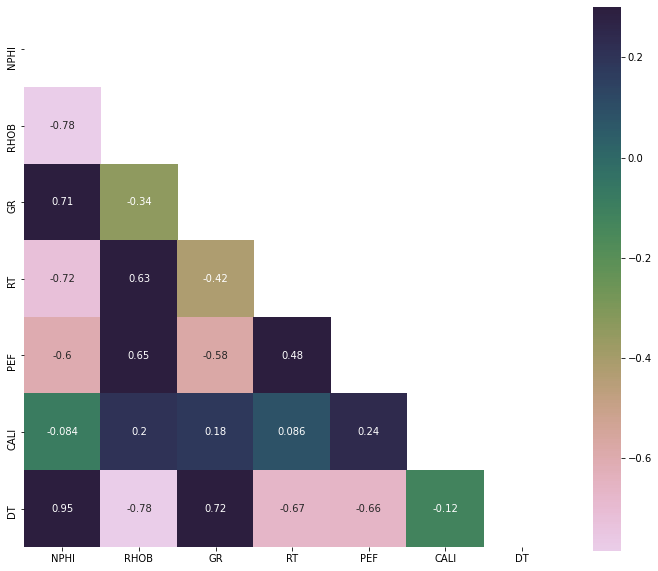

In [89]:
# generates mask for upper triangle
mask = np.zeros_like(well_train[train_features].corr(method="spearman"), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#generates a custor diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# draw heatmap
plt.figure(figsize=(12,10))
sns.heatmap(well_train[train_features].corr(method="spearman"), annot=True, mask=mask, cmap=cmap, vmax=0.3, square=True)
plt.show()

# NORMALIZATION

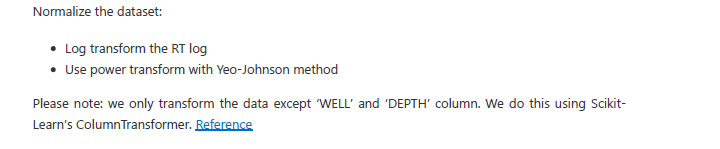

https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set

In [90]:
colnames = well_train.columns
colnames

Index(['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT', 'WELL', 'DEPTH'], dtype='object')

In [91]:
OnlyFeature=['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI']
OnlyTarget=['DT']
FeatureTarget=np.append(OnlyFeature,OnlyTarget)
FeatureTarget

array(['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT'], dtype='<U4')

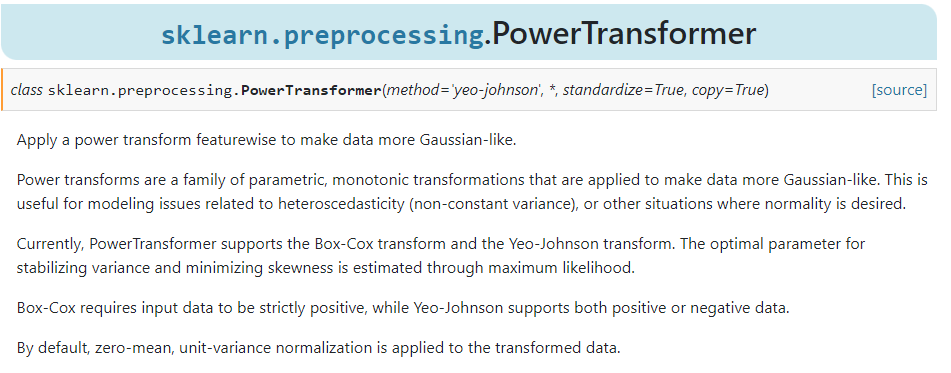

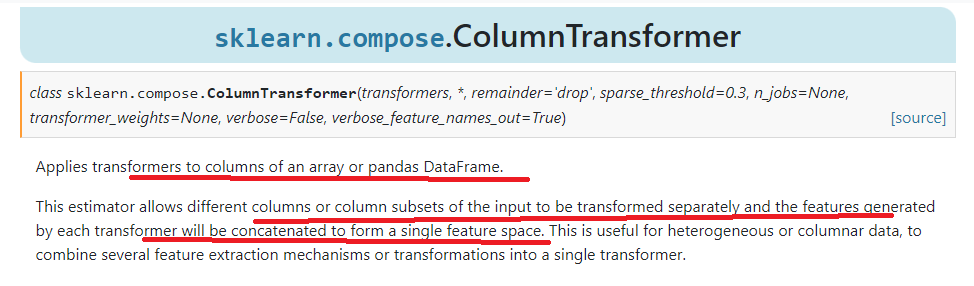

In [92]:
well_train.isna().sum()

NPHI     0
RHOB     0
GR       0
RT       0
PEF      0
CALI     0
DT       0
WELL     0
DEPTH    0
dtype: int64

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

well_train["RT"]=np.log10(well_train["RT"])  # transform RT to logaritmic
scaler = PowerTransformer(method="yeo-johnson")  # normalize using power trasnform

# columntrasnformer
column_drop=["WELL","DEPTH"]
ct = ColumnTransformer([("transform", scaler, FeatureTarget)],remainder="passthrough")
well_train_norm = ct.fit_transform(well_train)

well_train_norm = pd.DataFrame(well_train_norm, columns=colnames)
well_train_norm

,NPHI,RHOB,GR,RT,PEF,CALI,DT,WELL,DEPTH
0,1.70217,-0.920748,1.13065,-0.631876,0.0310832,0.450019,1.58838,15_9_F_11A,2600
1,1.5734,-1.02062,1.09243,-0.736154,-0.373325,-1.07085,1.56235,15_9_F_11A,2600.1
2,1.40711,-1.14249,1.03031,-0.75808,-0.81989,-1.07085,1.52506,15_9_F_11A,2600.2
3,1.26069,-1.26308,0.956135,-0.784153,-1.19799,-1.75364,1.46093,15_9_F_11A,2600.3
4,1.18987,-1.36797,0.837247,-0.816586,-1.44115,-2.28622,1.36743,15_9_F_11A,2600.4
...,...,...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.04171,0.0479411,15_9_F1B,3399.6
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.51043,0.043466,15_9_F1B,3399.7
24400,0.393869,-0.232335,0.849885,-0.65312,-0.774093,1.51043,0.0425913,15_9_F1B,3399.8
24401,0.373838,-0.176628,0.82264,-0.569367,-0.782672,1.51043,0.0445959,15_9_F1B,3399.9


In [94]:
well_train_norm.dtypes

NPHI     object
RHOB     object
GR       object
RT       object
PEF      object
CALI     object
DT       object
WELL     object
DEPTH    object
dtype: object

In [96]:
x=well_train_norm[FeatureTarget].astype(float)
y=well_train_norm["WELL"].astype(str)
z=well_train_norm["DEPTH"].astype(float)
well_train_norm=pd.concat([x,y,z],axis=1)
well_train_norm.dtypes

NPHI     float64
RHOB     float64
GR       float64
RT       float64
PEF      float64
CALI     float64
DT       float64
WELL      object
DEPTH    float64
dtype: object

In [97]:
well_train_norm

,NPHI,RHOB,GR,RT,PEF,CALI,DT,WELL,DEPTH
0,1.702168,-0.920748,1.130650,-0.631876,0.031083,0.450019,1.588380,15_9_F_11A,2600.0
1,1.573404,-1.020621,1.092435,-0.736154,-0.373325,-1.070848,1.562349,15_9_F_11A,2600.1
2,1.407108,-1.142493,1.030314,-0.758080,-0.819890,-1.070848,1.525055,15_9_F_11A,2600.2
3,1.260691,-1.263078,0.956135,-0.784153,-1.197992,-1.753641,1.460934,15_9_F_11A,2600.3
4,1.189869,-1.367969,0.837247,-0.816586,-1.441155,-2.286221,1.367432,15_9_F_11A,2600.4
...,...,...,...,...,...,...,...,...,...
24398,0.462363,-0.279351,0.839177,-0.704005,-0.910619,2.041708,0.047941,15_9_F1B,3399.6
24399,0.439808,-0.261621,0.860577,-0.694407,-0.826995,1.510434,0.043466,15_9_F1B,3399.7
24400,0.393869,-0.232335,0.849885,-0.653120,-0.774093,1.510434,0.042591,15_9_F1B,3399.8
24401,0.373838,-0.176628,0.822640,-0.569367,-0.782672,1.510434,0.044596,15_9_F1B,3399.9


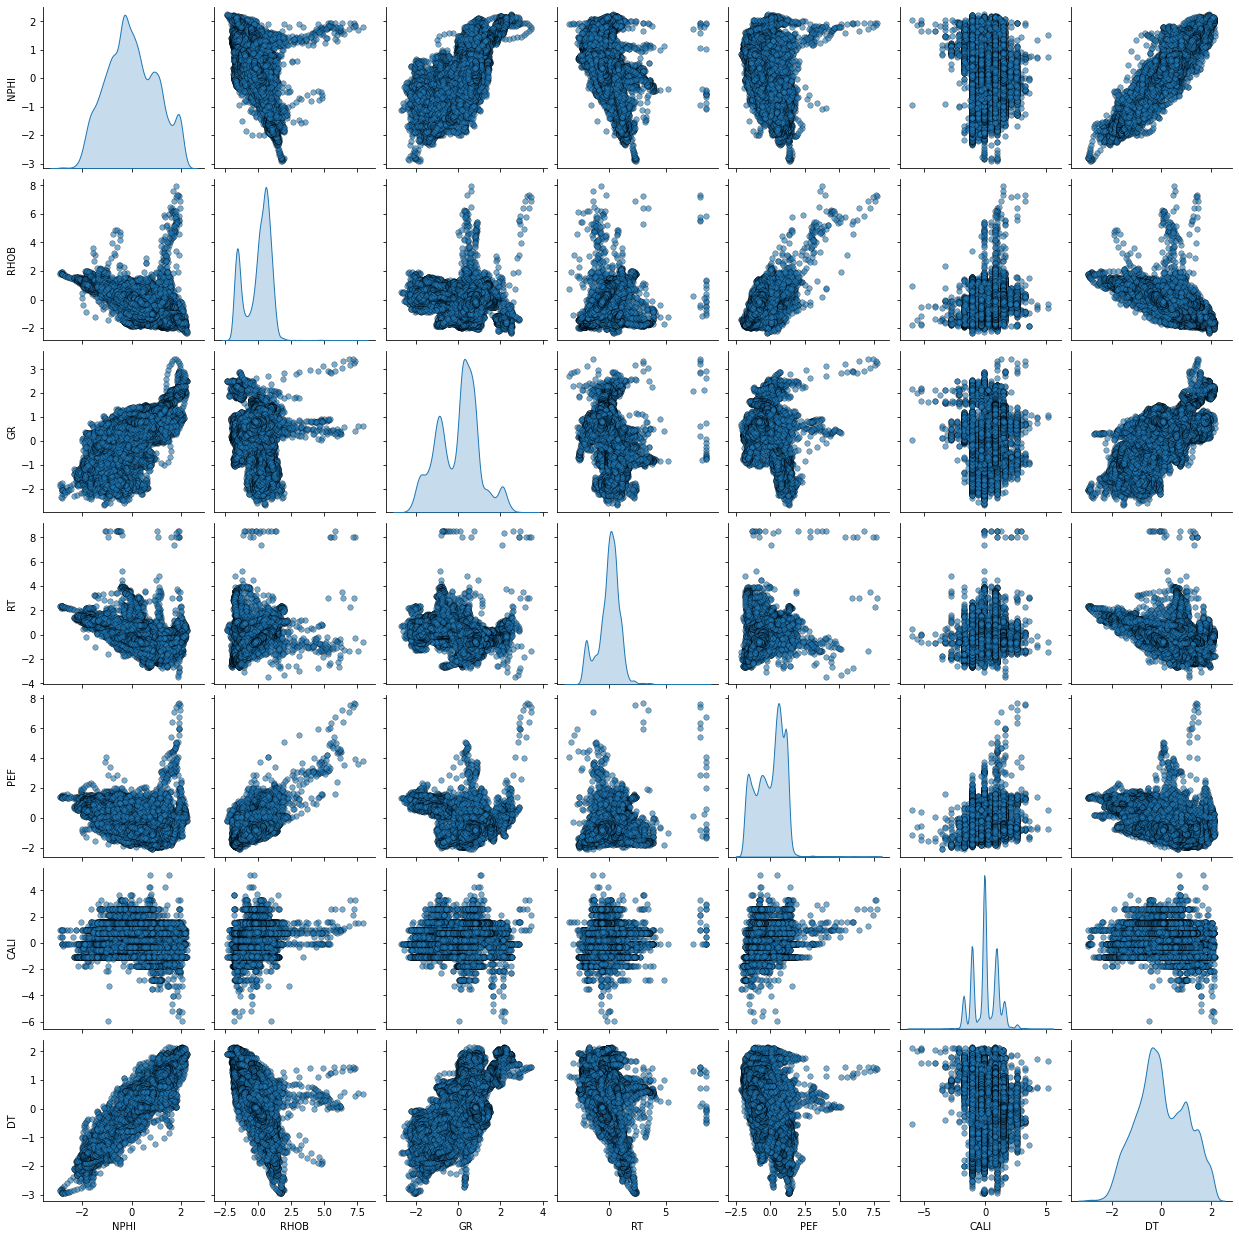

In [98]:
#train_features = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI' , 'DT']
sns.pairplot(well_train_norm, vars=FeatureTarget, diag_kind="kde",
            plot_kws={"alpha":0.6, "s":30, "edgecolor":"k"})